<a href="https://colab.research.google.com/github/devilgupta/C119/blob/main/C119_(DECISION_TREE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving C119.csv to C119.csv


In [2]:
import pandas as pd
columnames=["Pregnant","Glucose","BP","Skin","Insulin","BMI","Pedigree","Age","Label"]
df=pd.read_csv("C119.csv",names=columnames).iloc[1:]
print(df.head())

  Pregnant Glucose  BP Skin Insulin   BMI Pedigree Age Label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


In [6]:
features=["Pregnant","Glucose","BP","Skin","Insulin","BMI","Pedigree","Age"]
X=df[features]
y=df.Label

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 67.53246753246754


In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<BMI &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<BMI &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<Glucose &le; 114.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<Pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor

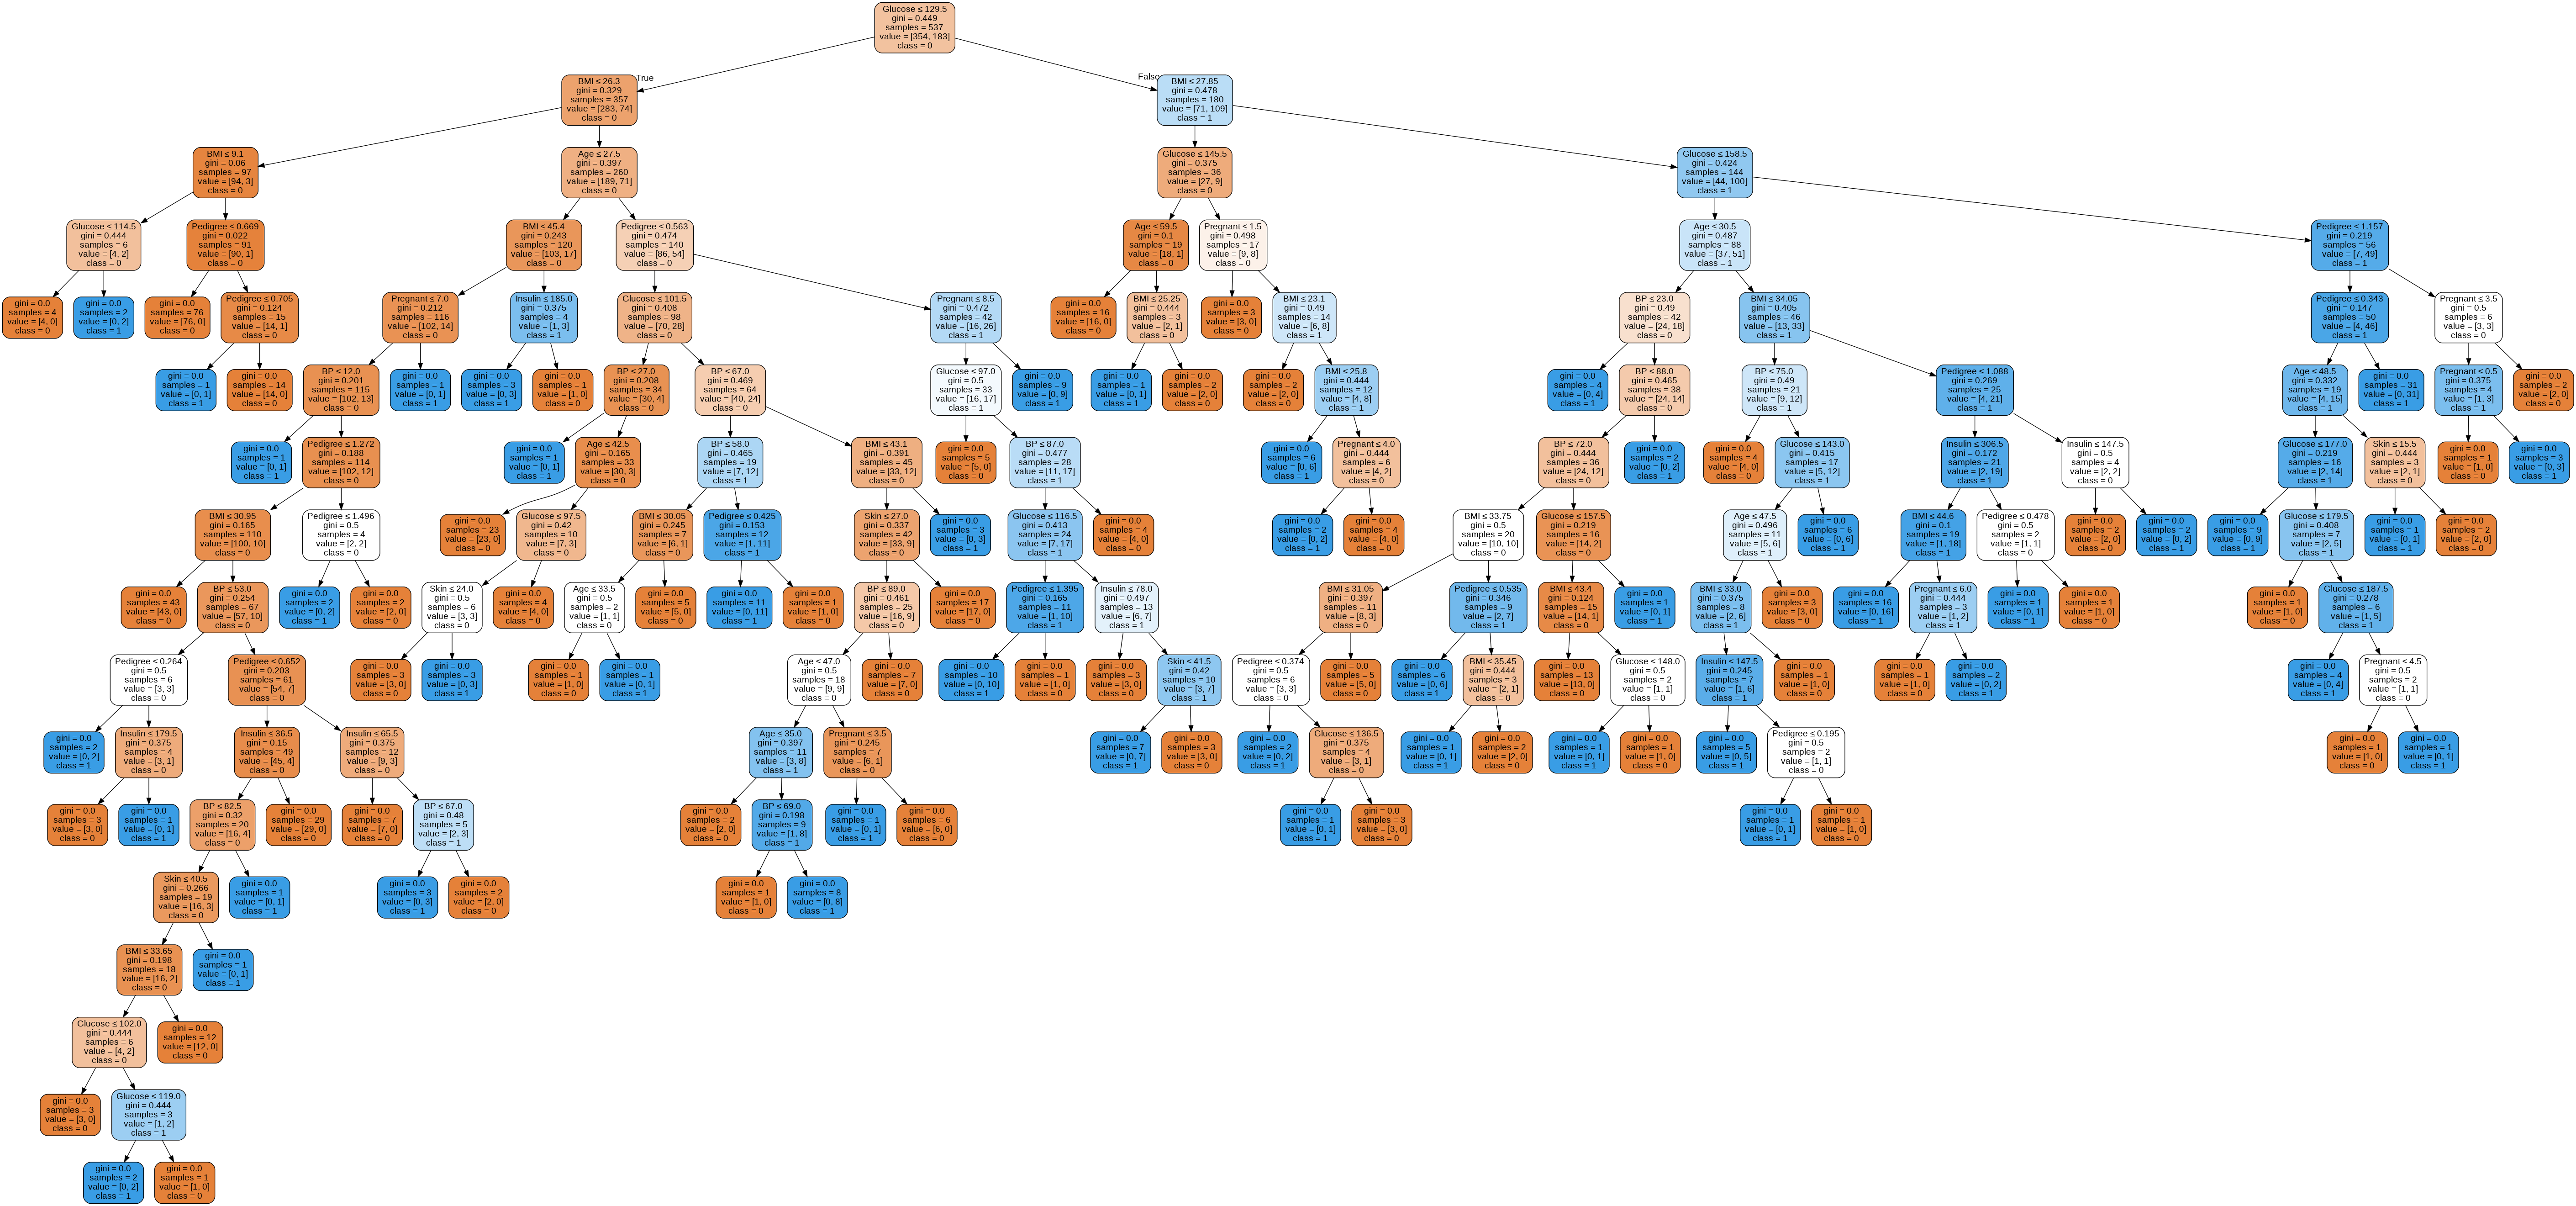

In [10]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Diabetes.png")
Image(graph.create_png())

In [18]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 75.75757575757575


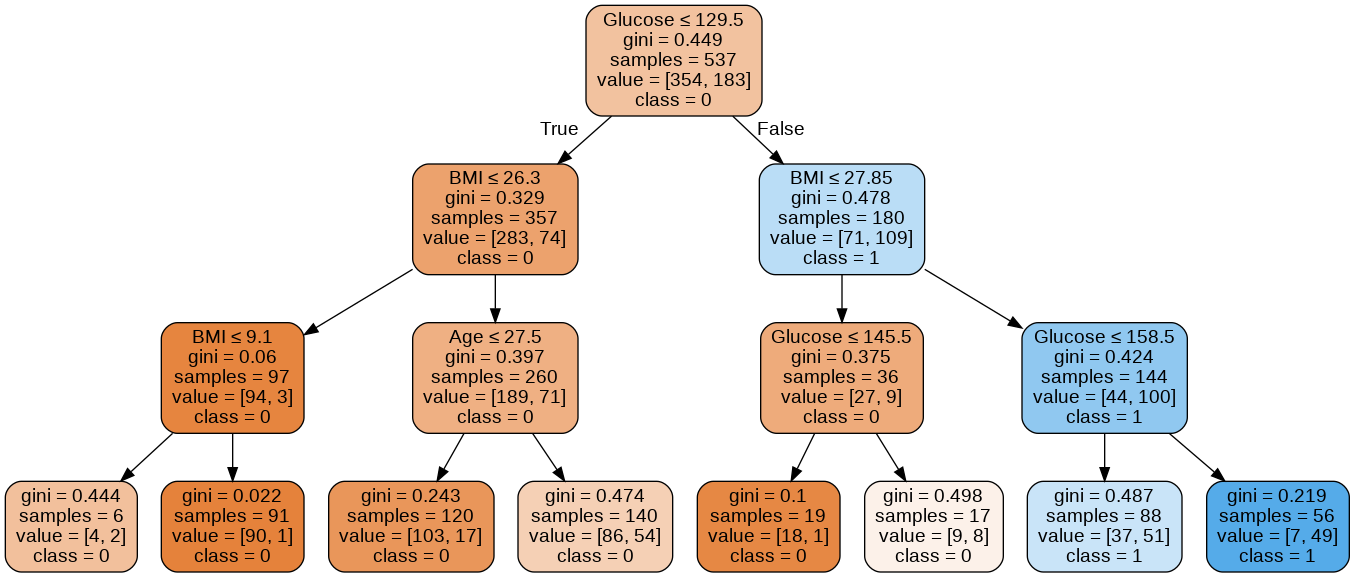

In [19]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Diabetes.png")
Image(graph.create_png())